In [33]:
from torchvision import datasets

dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

In [34]:
dataset_train = datasets.CIFAR10('.', train=True, download=True)
dataset_val = datasets.CIFAR10('.', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
len(dataset_train), len(dataset_val),

(50000, 10000)

In [36]:
img, label = dataset_train.__getitem__(159)

(<matplotlib.image.AxesImage at 0x1a01ff45ad0>, 3)

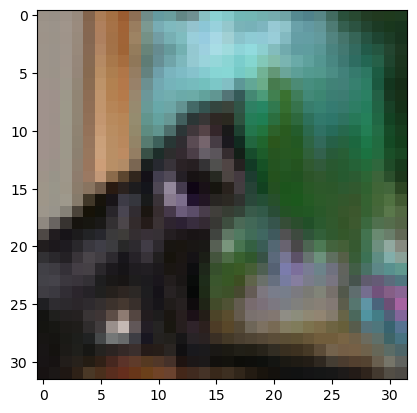

In [37]:
from matplotlib import pyplot  as plt

plt.imshow(img), label

In [38]:
from torchvision import transforms

to_tensor = transforms.ToTensor()

to_tensor(img).shape

torch.Size([3, 32, 32])

In [39]:
dataset_train = datasets.CIFAR10('.', train=True, download=True, transform=transforms.ToTensor())
dataset_val = datasets.CIFAR10('.', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [40]:
img_t, label = dataset_train[159]
img_t.shape

torch.Size([3, 32, 32])

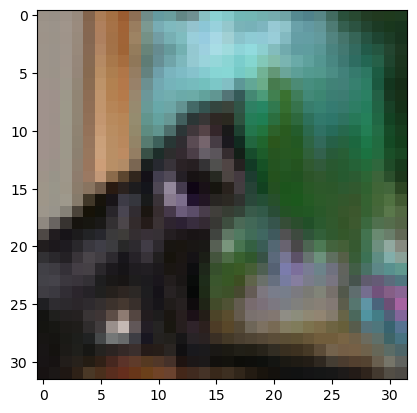

In [41]:
plt.imshow(img_t.permute(1,2,0))

In [42]:
import  torch


imgs = torch.stack([img for (img, label) in dataset_train], dim = 3)

In [43]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [44]:
imgs.view(3, -1).shape

torch.Size([3, 51200000])

In [45]:
means = imgs.view(3, -1).mean(dim=1)
stds = imgs.view(3, -1).std(dim=1)
means, stds

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [46]:
dataset_train_trans = datasets.CIFAR10('.', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means.numpy(), stds.numpy())
]))
dataset_val_trans = datasets.CIFAR10('.', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means.numpy(), stds.numpy())
]))

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32, 50000])

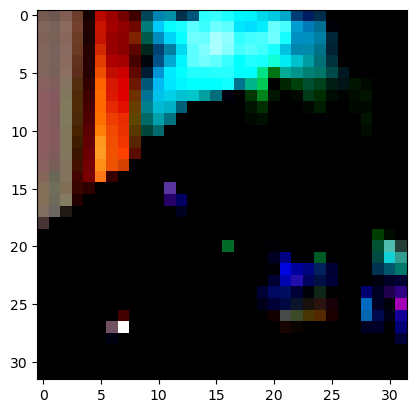

In [47]:
img, label = dataset_train_trans[159]
plt.imshow(img.permute(1,2,0))

imgs = torch.stack([img for img, label in dataset_train_trans], dim=3)
imgs.shape

In [48]:
imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([ 1.6880e-07, -1.2672e-07, -5.6610e-08]),
 tensor([1.0000, 1.0000, 1.0000]))

In [49]:
label_map = {0:0, 2:1}
class_names = ["airplane", "bird"]

dataset_train_2 = [(img, label_map[label]) for img, label in dataset_train_trans if label in [0,2]]
dataset_val_2 = [(img, label_map[label]) for img, label in dataset_val_trans if label in [0,2]]

len(dataset_train_2), len(dataset_val_2), 

(10000, 2000)

In [50]:
import torch.nn as nn
n_classes = 2
model = nn.Sequential(
    nn.Linear(3072, 512),       # 3072 in features, 512 out features, bias is on
                                # 512 neaurons, each nearon has 3072 weights, 1 bias
    nn.Tanh(),
    nn.Linear(512, n_classes)   
)

In [51]:
x = torch.tensor([[1.,2.,3.], [1.,2.,3.]], dtype=float)
torch.exp(x)

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

softmax(x).sum()

sftmx = nn.Softmax(dim=1)
sftmx(x), softmax(x)

(tensor([[0.0900, 0.2447, 0.6652],
         [0.0900, 0.2447, 0.6652]], dtype=torch.float64),
 tensor([[0.0450, 0.1224, 0.3326],
         [0.0450, 0.1224, 0.3326]], dtype=torch.float64))

In [52]:
model = nn.Sequential(
    nn.Linear(3072, 512),       # 3072 in features, 512 out features, bias is on
                                # 512 neaurons, each nearon has 3072 weights, 1 bias
    nn.Tanh(),
    nn.Linear(512, n_classes),   # 512 in features, n_classes out features, bias is on
                                # n_classes neaurons, each nearon has 512 weights, 1 bias
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


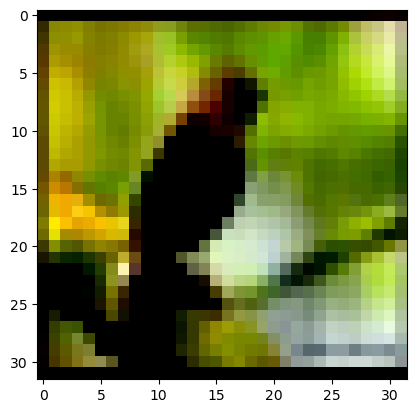

In [53]:
img, label = dataset_train_2[100]
plt.imshow(img.permute(1,2,0))

In [54]:
# img.view(-1), img.view(-1).unsqueeze(0)
img = img.view(-1).unsqueeze(0)
model(img)

tensor([[0.4238, 0.5762]], grad_fn=<SoftmaxBackward0>)

In [55]:
model = nn.Sequential(
    nn.Linear(3072, 512),       # 3072 in features, 512 out features, bias is on
                                # 512 neaurons, each nearon has 3072 weights, 1 bias
    nn.Tanh(),
    nn.Linear(512, n_classes),   # 512 in features, n_classes out features, bias is on
                                # n_classes neaurons, each nearon has 512 weights, 1 bias
    nn.LogSoftmax(dim=1)
)

In [56]:
out = model(img)

In [57]:
loss_fn = nn.NLLLoss()
loss_fn(out, torch.tensor([label]))

tensor(0.6566, grad_fn=<NllLossBackward0>)

In [58]:
train_loader = torch.utils.data.DataLoader(dataset_train_2, batch_size=64, shuffle=True)

len(train_loader)

157

In [59]:
[(imgs.shape, labels.shape) for imgs, labels in train_loader][0]

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [60]:
val_loader = torch.utils.data.DataLoader(dataset_val_2, batch_size=64, shuffle=False)
len(val_loader)

32

In [61]:
[(imgs.shape, labels.shape) for imgs, labels in val_loader][0]

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [64]:
def training_loop(n_epochs, loss_fn, model, optimizer, train_loader, val_loader):
    for epoch in range(1, 1 + n_epochs):
        for imgs, labels in train_loader:
            batch_size = imgs.shape[0]
            outs = model(imgs.view(batch_size, -1)) # outs : batch_size * n_calsses
            loss = loss_fn(outs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print("epoch=%d loss=%f" %(epoch, loss))    # loss of last batch
    
    total = 0
    correct = 0
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outs = model(imgs.view(batch_size, -1)) # outs : batch_size * n_calsses
        max_vals, max_classes = outs.max(dim=1) # max_vals : batch_size, max_classes : batch_size
        total += batch_size
        correct += (max_classes == labels).sum() # number of correct pred in a single batch
    print("accuracy=%f" %(correct/total))
        

In [65]:
import torch.optim as optim

training_loop(
    n_epochs=50,
    loss_fn=nn.NLLLoss(),
    model=model,
    optimizer=optim.SGD(model.parameters(), lr=0.01),
    train_loader=train_loader,
    val_loader=val_loader
)

epoch=10 loss=0.054986
epoch=20 loss=0.058616
epoch=30 loss=0.029432
epoch=40 loss=0.011408
epoch=50 loss=0.024085
accuracy=0.812000


In [ ]:
model_bigger = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024,512),
    nn.Tanh(),
    nn.Linear(512,128),
    nn.Tanh(),
    nn.Linear(128,n_classes),
    nn.LogSoftmax(dim=1)
    )

In [ ]:
[param.shape for param in model.parameters() if param.requires_grad==True]

[torch.Size([512, 3072]),
 torch.Size([512]),
 torch.Size([2, 512]),
 torch.Size([2])]

In [ ]:
[param.numel() for param in model.parameters() if param.requires_grad==True]

[1572864, 512, 1024, 2]

In [ ]:
sum([param.numel() for param in model.parameters() if param.requires_grad==True])

1574402

In [ ]:
[param.shape for param in model_bigger.parameters() if param.requires_grad==True]

[torch.Size([1024, 3072]),
 torch.Size([1024]),
 torch.Size([512, 1024]),
 torch.Size([512]),
 torch.Size([128, 512]),
 torch.Size([128]),
 torch.Size([2, 128]),
 torch.Size([2])]

In [ ]:
[param.numel() for param in model_bigger.parameters() if param.requires_grad==True]

[3145728, 1024, 524288, 512, 65536, 128, 256, 2]

In [ ]:
sum([param.numel() for param in model_bigger.parameters() if param.requires_grad==True])

3737474